# DEFINITIONS

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tqdm.notebook import tqdm as progressbar

In [2]:
def normalize_d(data):
    return (data - data.min()) / (data.max() - data.min())

def denormalize_d(data, base):
    return ( data * (base.max() - base.min()) ) + base.min()
    
def calculate_error(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = RandomForestRegressor(random_state=42, n_estimators=100)
    clf.fit(x_train,y_train)
    y_generated = clf.predict(x_test)
    return mean_absolute_percentage_error(y_generated, y_test)

def train(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = RandomForestRegressor(random_state=42, n_estimators=1000)
    clf.fit(x_train,y_train)
    return clf

# LOAD DATASETS

In [3]:
my_semantic = [
    'stature',
    'waist-girth',
    'hip-girth',
    'thigh-girth',
    'calf-girth',
    'neck-girth',
    'bust-girth',
    'wrist-girth',
    'upper-arm-girth',
    'biacromial-length',
    'neck-to-waist-length',
    'waist-height',
    'hip-height'
]
life_semantic = [
    'height',
    'waist_gth',
    'hip_gth',
    'thigh_gth_r_hz',# 'thigh_gth_l_hz'
    'calf_gth_r', # calf_gth_l
    'mid_neck_gth',
    'bust_chest_gth',
    'wrist_gth',
    'up_arm_gth_r',
    'cr_shoulder',
    'neck_waist_c_back',
    'waist_ht',
    'hip_ht'
]
ansur_semantic = [
    'stature',
    'waistcircumference',
    'buttockcircumference',
    'thighcircumference',
    'calfcircumference',
    'neckcircumference',
    'chestcircumference',
    'wristcircumference',
    'bicepscircumferenceflexed',
    'interscyeii',
    'waistbacklength',
    'waistheightomphalion',
    'trochanterionheight',
]


In [4]:
my_male = np.load("bodies-male-measures.npy")
my_female = np.load("bodies-female-measures.npy")

my_male = pd.DataFrame(my_male, columns=my_semantic)
my_female = pd.DataFrame(my_female, columns=my_semantic)

In [5]:
ansur_male = pd.read_csv("datasets/ansur_2_male.csv",encoding_errors='ignore')
ansur_male_age = ansur_male['Age']
ansur_male = ansur_male[ansur_semantic]/10
ansur_male.columns = my_semantic

ansur_female = pd.read_csv("datasets/ansur_2_female.csv",encoding_errors='ignore')
ansur_female_age = ansur_female['Age']
ansur_female = ansur_female[ansur_semantic]/10
ansur_female.columns = my_semantic

ansur_male_normalized = normalize_d(ansur_male)
ansur_male_age_normalized = normalize_d(ansur_male_age)

ansur_female_normalized = normalize_d(ansur_female)
ansur_female_age_normalized = normalize_d(ansur_female_age)

In [6]:
life = pd.read_csv("datasets/life.csv",encoding_errors='ignore').dropna()

life_male = life[life['Gender'] == 'male']
life_male.columns = life_male.columns.str.lower()
life_male_age = life_male['age']
life_male = life_male[life_semantic]
life_male.columns = my_semantic

life_female = life[life['Gender'] == 'female']
life_female.columns = life_female.columns.str.lower()
life_female_age = life_female['age']
life_female = life_female[life_semantic]
life_female.columns = my_semantic

life_male_normalized = normalize_d(life_male)
life_male_age_normalized = normalize_d(life_male_age)

life_female_normalized = normalize_d(life_female)
life_female_age_normalized = normalize_d(life_female_age)

In [7]:
ansur_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,175.621460,94.057741,101.951886,62.514233,39.226066,39.764895,105.870554,17.591671,35.813572,45.016316,47.761244,105.648530,90.093067
std,6.855079,11.170587,7.668107,5.845217,2.970884,2.577676,8.743527,0.895506,3.461809,3.048854,2.772829,5.215467,4.917166
min,149.100000,64.800000,73.700000,41.200000,26.600000,31.100000,77.400000,14.100000,24.600000,34.500000,38.300000,87.600000,73.100000
25%,171.000000,85.700000,96.700000,58.600000,37.200000,37.925000,99.600000,17.000000,33.500000,43.000000,45.925000,102.000000,86.700000
50%,175.500000,93.700000,101.700000,62.400000,39.200000,39.500000,105.600000,17.600000,35.700000,45.000000,47.700000,105.500000,89.900000
75%,180.200000,101.600000,106.800000,66.200000,41.200000,41.375000,111.700000,18.200000,38.000000,47.100000,49.500000,109.000000,93.200000
max,199.300000,137.900000,130.500000,84.300000,52.300000,51.400000,146.900000,21.600000,49.000000,57.700000,59.800000,124.500000,109.500000


In [8]:
life_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,176.088858,100.668937,105.084021,55.632190,38.678485,42.224841,107.880496,18.217338,31.467081,50.258372,43.756663,111.097501,87.890666
std,7.487432,12.257658,7.610317,4.655902,3.029959,3.573047,9.642352,1.151149,2.814044,3.386522,2.308203,5.383601,5.833081
min,99.350000,68.600000,87.400000,37.700000,28.200000,33.100000,72.150000,14.350000,22.800000,32.300000,26.950000,61.550000,69.500000
25%,171.300000,92.100000,100.100000,52.600000,36.600000,39.700000,101.100000,17.400000,29.600000,48.000000,42.200000,107.500000,83.800000
50%,176.100000,100.000000,103.900000,55.400000,38.400000,41.800000,107.100000,18.150000,31.200000,50.100000,43.700000,111.000000,87.700000
75%,181.100000,108.500000,108.800000,58.300000,40.500000,44.400000,113.900000,19.000000,32.900000,52.300000,45.300000,114.600000,91.800000
max,206.500000,143.500000,157.700000,82.700000,51.900000,59.100000,155.400000,25.000000,48.900000,71.366667,53.000000,135.900000,115.500000


In [9]:
male_collection = pd.concat([life_male,ansur_male], axis=0)
female_collection = pd.concat([life_female,ansur_female], axis=0)
male_collection_age = pd.concat([life_male_age, ansur_male_age], axis=0)
female_collection_age = pd.concat([life_female_age, ansur_female_age], axis=0)

male_collection_normalized = normalize_d(male_collection)
female_collection_normalized = normalize_d(female_collection)

male_collection_age_normalized = normalize_d(male_collection_age)
female_collection_age_normalized = normalize_d(female_collection_age)

<AxesSubplot:ylabel='Frequency'>

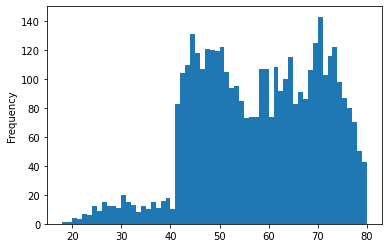

In [10]:
life_male_age.plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

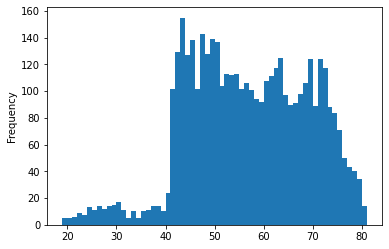

In [36]:
life_female_age.plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

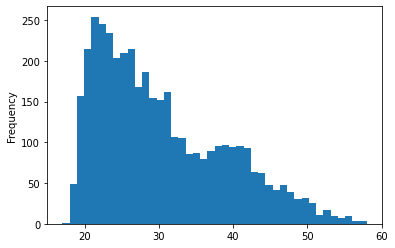

In [40]:
ansur_male_age.plot(kind='hist', bins=42)

<AxesSubplot:ylabel='Frequency'>

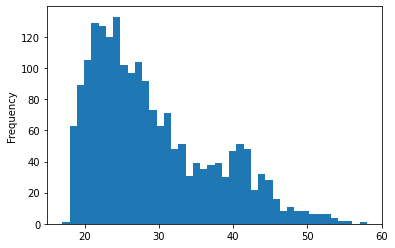

In [39]:
ansur_female_age.plot(kind='hist', bins=42)

<AxesSubplot:ylabel='Frequency'>

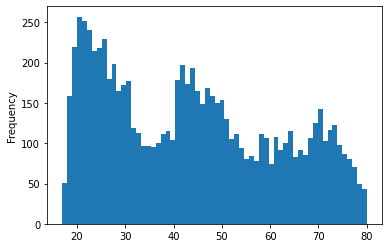

In [12]:
pd.concat([life_male_age, ansur_male_age], axis=0).plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

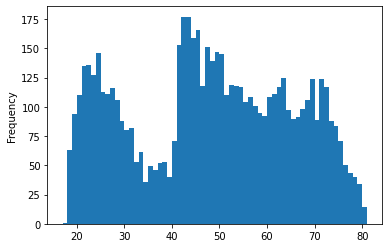

In [13]:
pd.concat([life_female_age, ansur_female_age], axis=0).plot(kind='hist', bins=64)

In [14]:
life_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,176.088858,100.668937,105.084021,55.632190,38.678485,42.224841,107.880496,18.217338,31.467081,50.258372,43.756663,111.097501,87.890666
std,7.487432,12.257658,7.610317,4.655902,3.029959,3.573047,9.642352,1.151149,2.814044,3.386522,2.308203,5.383601,5.833081
min,99.350000,68.600000,87.400000,37.700000,28.200000,33.100000,72.150000,14.350000,22.800000,32.300000,26.950000,61.550000,69.500000
25%,171.300000,92.100000,100.100000,52.600000,36.600000,39.700000,101.100000,17.400000,29.600000,48.000000,42.200000,107.500000,83.800000
50%,176.100000,100.000000,103.900000,55.400000,38.400000,41.800000,107.100000,18.150000,31.200000,50.100000,43.700000,111.000000,87.700000
75%,181.100000,108.500000,108.800000,58.300000,40.500000,44.400000,113.900000,19.000000,32.900000,52.300000,45.300000,114.600000,91.800000
max,206.500000,143.500000,157.700000,82.700000,51.900000,59.100000,155.400000,25.000000,48.900000,71.366667,53.000000,135.900000,115.500000


In [15]:
ansur_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,175.621460,94.057741,101.951886,62.514233,39.226066,39.764895,105.870554,17.591671,35.813572,45.016316,47.761244,105.648530,90.093067
std,6.855079,11.170587,7.668107,5.845217,2.970884,2.577676,8.743527,0.895506,3.461809,3.048854,2.772829,5.215467,4.917166
min,149.100000,64.800000,73.700000,41.200000,26.600000,31.100000,77.400000,14.100000,24.600000,34.500000,38.300000,87.600000,73.100000
25%,171.000000,85.700000,96.700000,58.600000,37.200000,37.925000,99.600000,17.000000,33.500000,43.000000,45.925000,102.000000,86.700000
50%,175.500000,93.700000,101.700000,62.400000,39.200000,39.500000,105.600000,17.600000,35.700000,45.000000,47.700000,105.500000,89.900000
75%,180.200000,101.600000,106.800000,66.200000,41.200000,41.375000,111.700000,18.200000,38.000000,47.100000,49.500000,109.000000,93.200000
max,199.300000,137.900000,130.500000,84.300000,52.300000,51.400000,146.900000,21.600000,49.000000,57.700000,59.800000,124.500000,109.500000


In [37]:
life_female.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,164.549745,90.445974,107.663437,57.346449,37.507700,35.874316,101.038740,16.382374,29.616314,46.334045,40.717312,102.532019,81.732263
std,6.880675,13.370739,10.024415,5.750482,3.420016,3.235896,11.007442,1.246011,3.221412,3.693511,2.369814,5.153316,5.575040
min,141.600000,59.700000,83.100000,38.500000,27.700000,28.000000,74.800000,12.800000,20.300000,36.600000,32.300000,84.750000,63.400000
25%,159.600000,80.100000,100.900000,53.500000,35.200000,33.500000,93.000000,15.500000,27.400000,43.800000,39.100000,99.000000,77.800000
50%,164.200000,89.700000,106.000000,56.600000,37.100000,35.400000,99.900000,16.200000,29.100000,46.000000,40.700000,102.300000,81.400000
75%,169.100000,99.225000,112.925000,60.500000,39.300000,37.900000,108.000000,17.100000,31.300000,48.400000,42.200000,106.100000,85.700000
max,188.400000,143.600000,183.300000,108.000000,61.900000,51.900000,148.200000,25.400000,45.000000,102.000000,51.300000,122.800000,104.200000


In [38]:
ansur_female.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,162.847331,86.090534,102.124773,61.614854,37.325780,32.979557,94.685801,15.479255,30.557855,39.570896,42.540282,98.014904,84.535096
std,6.419951,9.993177,7.589471,5.581030,2.851518,1.922114,8.269911,0.782770,3.075703,2.570713,2.638895,5.002271,4.467627
min,140.900000,61.100000,79.800000,44.800000,28.200000,27.500000,69.500000,12.400000,21.600000,30.600000,34.500000,80.500000,66.000000
25%,158.625000,79.000000,96.900000,57.900000,35.400000,31.600000,88.900000,15.000000,28.500000,37.900000,40.700000,94.700000,81.600000
50%,162.600000,85.200000,101.850000,61.300000,37.200000,32.800000,94.000000,15.400000,30.400000,39.600000,42.450000,97.750000,84.400000
75%,167.200000,92.500000,106.900000,65.100000,39.175000,34.200000,99.900000,16.000000,32.400000,41.200000,44.200000,101.300000,87.400000
max,182.900000,133.400000,134.100000,87.000000,48.200000,42.400000,126.600000,18.300000,43.500000,49.300000,53.200000,114.200000,101.800000


# REGRESSOR TEST

In [16]:
print(1 - calculate_error(life_male_normalized, life_male_age_normalized))
print(1 - calculate_error(life_female_normalized, life_female_age_normalized))
print(1 - calculate_error(ansur_male_normalized, ansur_male_age_normalized))
print(1 - calculate_error(ansur_female_normalized, ansur_female_age_normalized))
print(1 - calculate_error(male_collection_normalized, male_collection_age_normalized))
print(1 - calculate_error(female_collection_normalized, female_collection_age_normalized))

0.8218560887494342
0.8014503174350444
0.5421817908817115
0.4743693054208351
0.673687934559019
0.6967080252485642


In [17]:
X = life_male_normalized
y = life_male_age_normalized
x_train, x_test, y_train, y_test = train_test_split(ansur_male_normalized, y, test_size=0.33, random_state=42)
clf = RandomForestRegressor(random_state=42, n_estimators=100)
clf.fit(x_train,y_train)
print("Importancia:")
for score, name in sorted(zip(clf.feature_importances_, my_semantic)):
    print('{:06.2%}'.format(score), name)

Importancia:
06.77% wrist-girth
06.80% stature
07.04% hip-girth
07.25% thigh-girth
07.44% neck-girth
07.58% waist-height
07.68% upper-arm-girth
07.80% waist-girth
07.83% calf-girth
07.86% bust-girth
08.13% neck-to-waist-length
08.78% hip-height
09.03% biacromial-length


In [18]:
X = ansur_male_normalized
y = ansur_male_age_normalized
x_train, x_test, y_train, y_test = train_test_split(ansur_male_normalized, y, test_size=0.33, random_state=42)
clf = RandomForestRegressor(random_state=42, n_estimators=100)
clf.fit(x_train,y_train)
print("Importancia:")
for score, name in sorted(zip(clf.feature_importances_, my_semantic)):
    print('{:06.2%}'.format(score), name)

Importancia:
03.92% stature
04.31% waist-height
04.42% hip-height
04.77% wrist-girth
05.15% biacromial-length
05.41% neck-to-waist-length
05.64% calf-girth
05.72% hip-girth
05.83% neck-girth
06.37% bust-girth
06.51% upper-arm-girth
14.98% thigh-girth
26.96% waist-girth


# AGE INTERVAL ANALISYS

In [19]:
def interval_tests(data_normalized, age, nage, interval):
    age_interval = age.between(*interval)
    data_normalized = data_normalized[age_interval]
    nage = nage[age_interval]
    if data_normalized.size == 0:
        return np.nan
    error = calculate_error(data_normalized, nage)
    return error

In [20]:
datasets_array = [
    ('life_male', life_male_normalized, life_male_age, life_male_age_normalized),
    ('life_female', life_female_normalized, life_female_age, life_female_age_normalized),
    ('ansur_male', ansur_male_normalized, ansur_male_age, ansur_male_age_normalized),
    ('ansur_female', ansur_female_normalized, ansur_female_age, ansur_female_age_normalized),
    ('collection_male', male_collection_normalized, male_collection_age, male_collection_age_normalized),
    ('collection_female', female_collection_normalized, female_collection_age, female_collection_age_normalized),
]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

<AxesSubplot:>

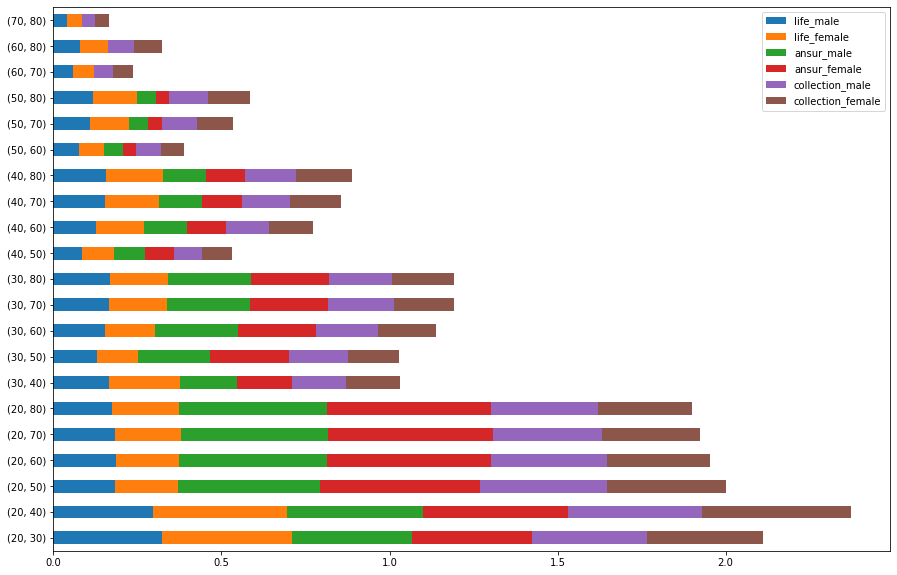

In [21]:
data_extracted = {}
comb = list(combinations(range(20,81,10), 2))
for name, data, nage, age in progressbar(datasets_array):
    data_extracted[name] = []
    for interval in progressbar(comb, leave=False):
        test = interval_tests(data, nage, age, interval)
        data_extracted[name].append(test)
extracted = pd.DataFrame(data_extracted, index=comb)
extracted.plot(kind='barh', figsize=(15,10), stacked=True)

<AxesSubplot:>

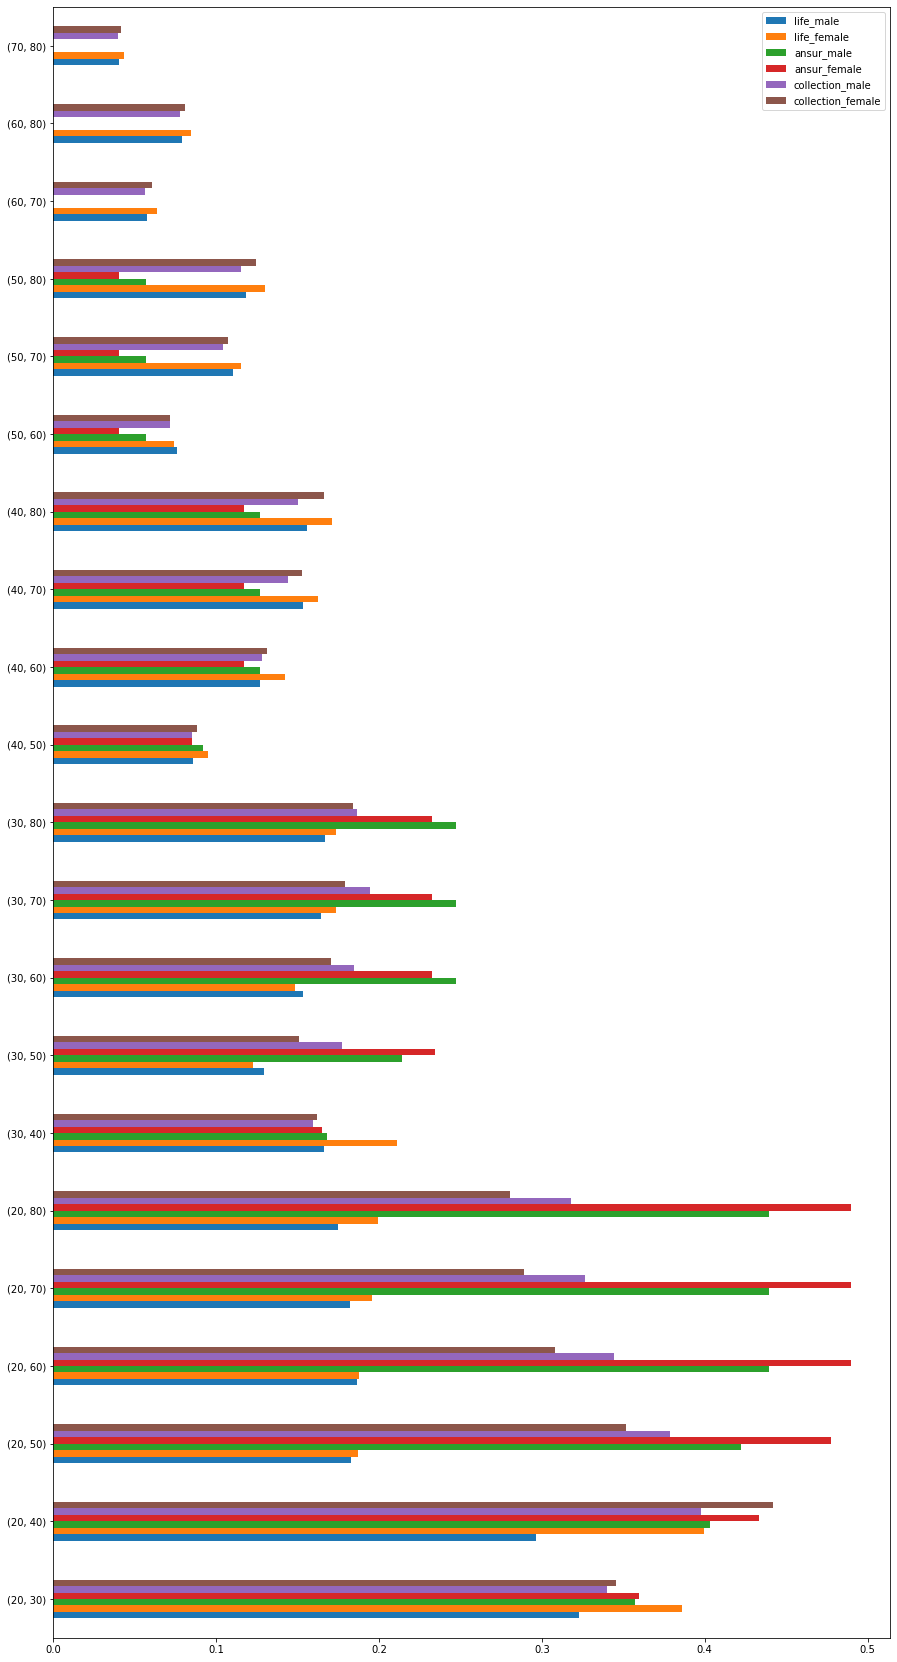

In [22]:
extracted.plot(kind='barh', figsize=(15,30))

<AxesSubplot:>

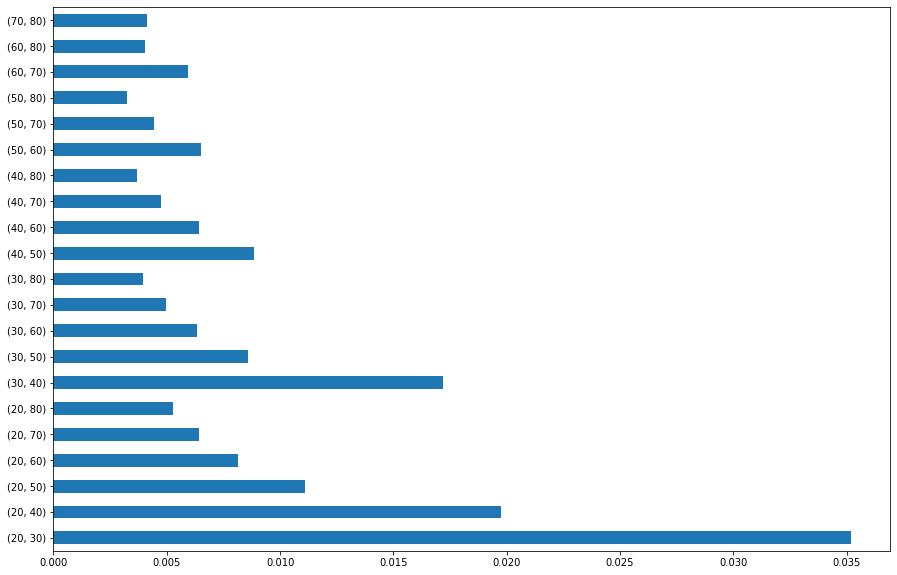

In [23]:
mean_of_errors = extracted.mean(axis=1)
interval_sizes = np.diff(np.array(list(extracted.index)), axis=1).flatten()
factor = mean_of_errors/interval_sizes
factor.plot(kind='barh', figsize=(15,10))

In [24]:
minimal = factor.argmin()
print(factor.keys()[minimal], factor[minimal])

(50, 80) 0.003250289577822522


In [25]:
factor_copy = factor.copy()
minimal_id = factor.keys()[minimal]
factor_copy = factor_copy.drop(index=minimal_id)
minimal = factor_copy.argmin()
print(factor_copy.keys()[minimal], factor_copy[minimal])

(40, 80) 0.003696395743742346


# REGRESSORS APPLY

## REGRESSOR APPLY WITH COLLECTION

In [26]:
def applier(source_data, source_age, target_data, interval=(15, 85)):
    selected_ages = source_age.between(*interval)
    selected_source_data = source_data[selected_ages]
    selected_source_age = source_age[selected_ages]
    
    predictor = train(normalize_d(selected_source_data), normalize_d(selected_source_age))
    target_age = predictor.predict(normalize_d(target_data))
    target_age = denormalize_d(target_age, selected_source_age)
    target_age = np.rint(target_age)

    pd.Series(target_age).plot(kind="hist", bins=np.arange(interval[0], interval[1], 1), figsize=(20,5))

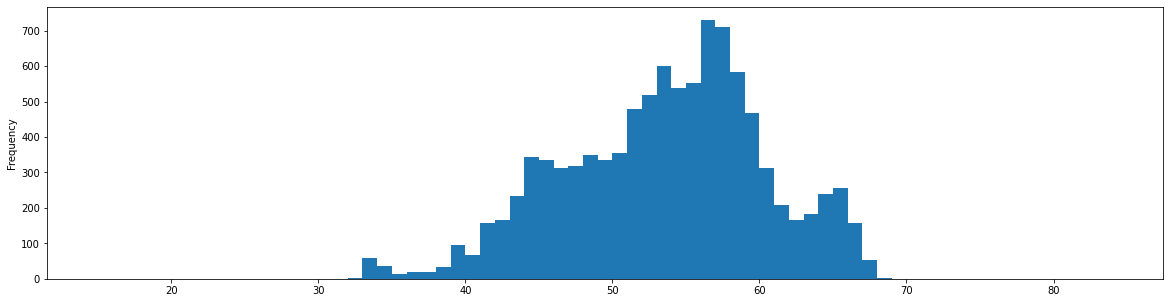

In [27]:
applier(male_collection, male_collection_age, my_male)

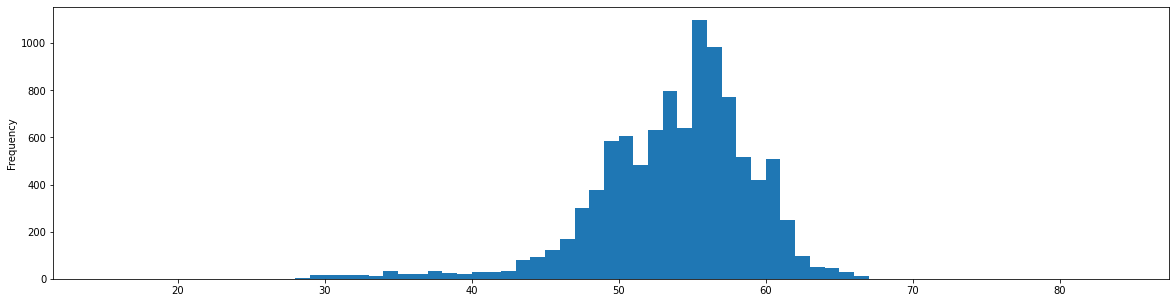

In [28]:
applier(female_collection, female_collection_age, my_female)

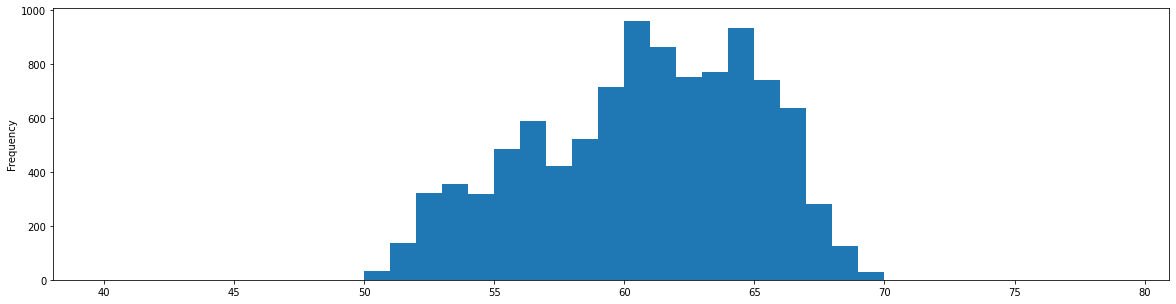

In [29]:
applier(male_collection, male_collection_age, my_male, (40,80))

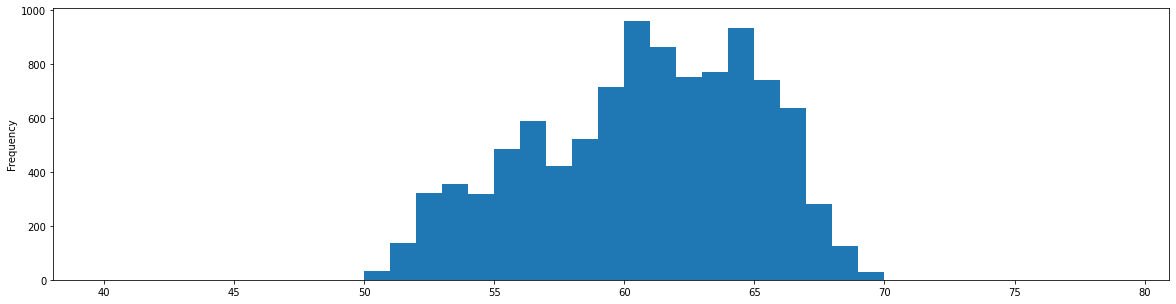

In [30]:
applier(male_collection, male_collection_age, my_male, (40,80))

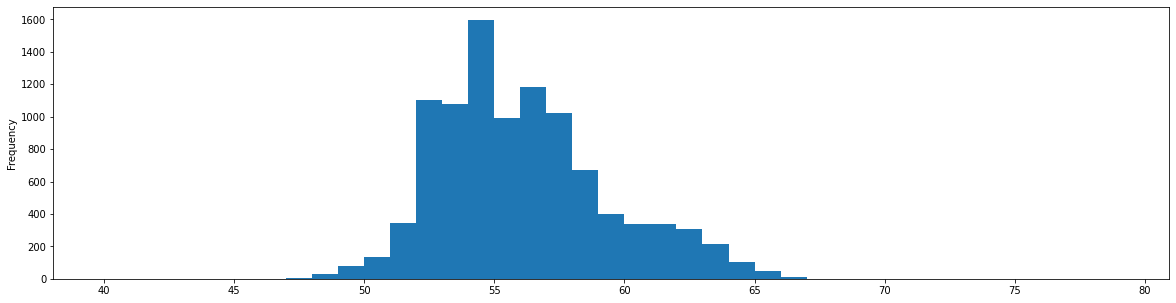

In [31]:
applier(female_collection, female_collection_age, my_female, (40,80))

## REGRESSOR APPLY WITH LIFE

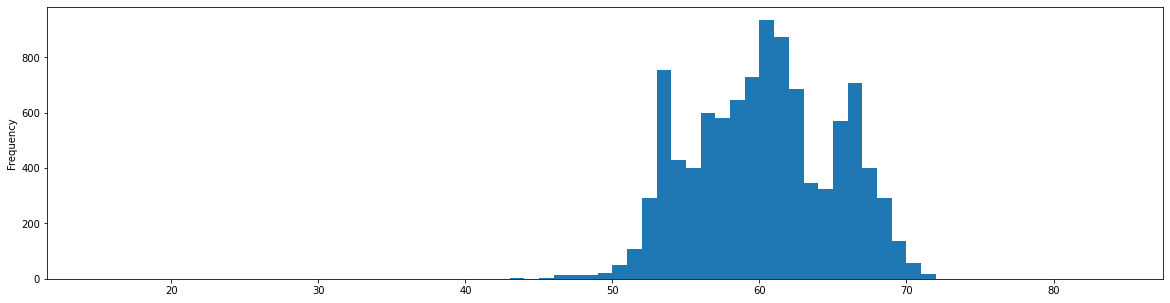

In [32]:
applier(life_male, life_male_age, my_male)

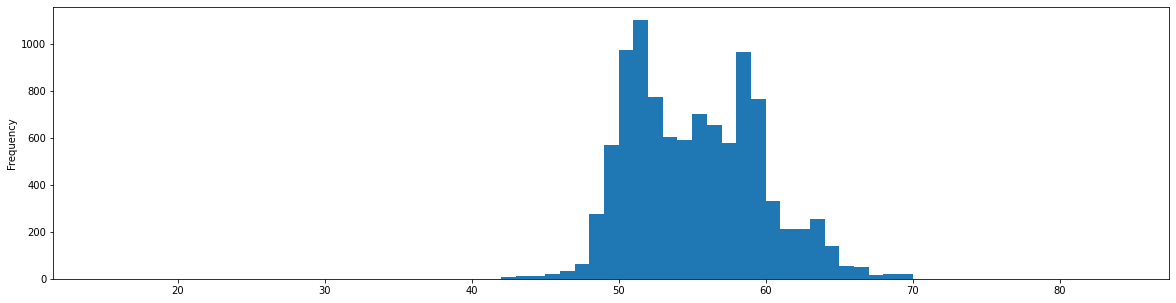

In [33]:
applier(life_female, life_female_age, my_female)


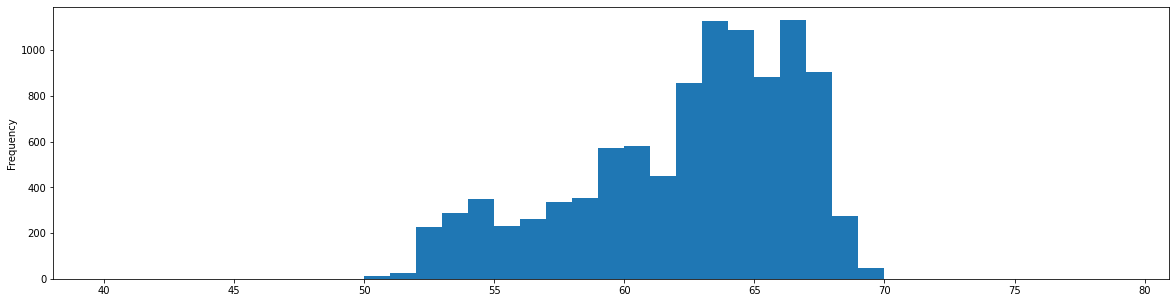

In [34]:
applier(life_male, life_male_age, my_male, (40,80))

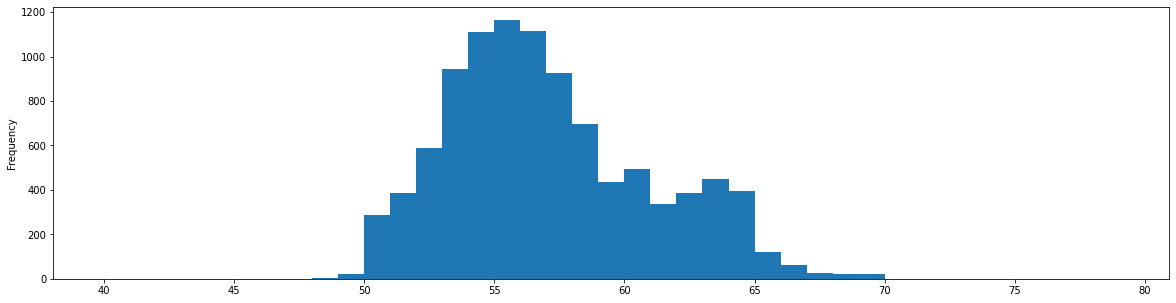

In [35]:
applier(life_female, life_female_age, my_female, (40,80))